##### src: [Machine Learning Tutorial Python](https://www.youtube.com/watch?v=gmvvaobm7eQ) by Dhaval Patel
---
---

## Requirements
---
---

In [68]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn import tree, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.datasets import load_digits, load_iris, load_breast_cancer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

## Linear Regression
---
---
Predicting a continous value based on a single input value
- Utilises a linear function: $ y = m*x + b $
    - `y = target value`
    - `m = slope `
    - `x = argument` 
    - `b = interception with y-axis`

In [2]:
path = os.path.join("data", "linear_regression_data.csv")
# loading the data
df = pd.read_csv(path)
# display the numeric data
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


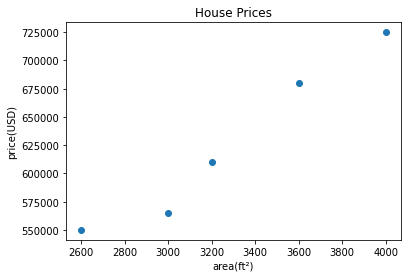

In [3]:
# explore data visually
# %matplotlib inline
plt.xlabel("area(ft²)")
plt.ylabel("price(USD)")
plt.title("House Prices")
plt.scatter(df.area, df.price)

In [4]:
# initializing the model
model = LinearRegression()
# pass data and train the mode, NOTE: first argument is expected to be a column vector, hence the different approaches to value retrieval, 
# the "values" method omits the header of the dataframe
model.fit(df[["area"]].values, df.price)
# use model to predict price (y) for a list of arguments (area (X))
X = np.array([[1000], [2000], [9001]])
model.predict(X)

array([ 316404.10958904,  452191.78082192, 1402841.26712329])

y = f(x)
y = m * x + b 
y = 135.78767123287673 * x + 180616.43835616432


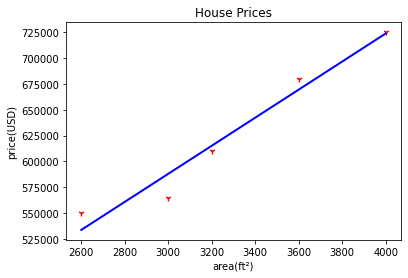

In [5]:
# display function graph (y = m*x + b) with the minimal distance to all samples, 
print("y = f(x)")
print("y = m * x + b", "\ny =", model.coef_[0], "* x +", model.intercept_)
plt.xlabel("area(ft²)")
plt.ylabel("price(USD)")
plt.title("House Prices")
plt.scatter(df.area, df.price, color = "red", marker = "1")
plt.plot(df.area, model.predict(df[["area"]].values), color = "blue", linewidth = 2)

## Multivariable Linear Regression
---
---
Predicting a continous value based on multiple input values
- Utilises a function of this shape: $ y = m1*x1 + m2*x2 + m3*x3 + ... + b $
    - `y = target value`
    - `m = factors`
    - `x = arguments` 
    - `b = interception with y-axis`

In [6]:
path = os.path.join("data", "multivariate_regression_data.csv")
# loading the data
df = pd.read_csv(path)
# display the numeric data
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,596000
4,4000,5.0,8,760000


In [7]:
# handling NaN by averaging present values
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.5,18,610000
3,3600,3.0,30,596000
4,4000,5.0,8,760000


In [8]:
# initializing the model
model = LinearRegression()
# passing the independent variables (factors of m1, m2, m3) to the model and start training 
# price (dependent variable) = m1*area + m2*bedrooms + m3*age + b
# b = interception with y-axis 
model.fit(df[["area", "bedrooms", "age"]].values, df.price)

LinearRegression()

In [9]:
# displaying m1, m2, m3 and interception with y-axis
print(model.coef_, model.intercept_)

[    198.56145032 -116060.587035    -14172.18646994] 652276.4087270447


In [10]:
# use model to predict price (y) for an array of arguments
area = 3000
bedrooms = 3
age = 40
features = np.array([[area, bedrooms, age]])
int(model.predict(features)[0])

332891

## Logistic Regression
---
---
Used for binary classification

- Utilises the logit function (aka sigmoid function): $ y = \frac{1}{1 + e^{-x}} $
    - `y = target value`
    - `e = Euler's number (2.71828...) -> base of natural logarithm`
    - `x = arguments` <br><br>
- Passes linear function into sigmoid function: $y = \frac{1}{1 + e^{-(m*x + b)}} $

In [11]:
path = os.path.join("data", "logistic_regression_data.csv")
# loading the data
df = pd.read_csv(path)
# display some of the numeric data
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


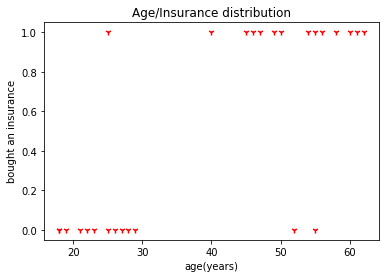

In [12]:
# explore data visually
plt.xlabel("age(years)")
plt.ylabel("bought an insurance")
plt.title("Age/Insurance distribution")
plt.scatter(df.age, df.bought_insurance, marker="1", color= "red")

In [13]:
# splitting Data into Training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size = 0.9)

In [14]:
# initializing the model
model = LogisticRegression()
# pass data and train the model
model.fit(X_train, y_train)
# get prediction accuracy
model.score(X_test, y_test)

0.6666666666666666

In [15]:
# shape = Customer-ID, age
print("Customer data yet unpredicted:\n", X_test, "\n")
# predict values for unknown data
print("Prediction:", model.predict(X_test), "\n")
# display probability for predicted value
print("Probability for given predictions:\n", model.predict_proba(X_test))

Customer data yet unpredicted:
     age
22   40
0    22
3    52 

Prediction: [1 0 1] 

Probability for given predictions:
 [[0.40276701 0.59723299]
 [0.9197518  0.0802482 ]
 [0.09257699 0.90742301]]


C:\Users\pompom\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


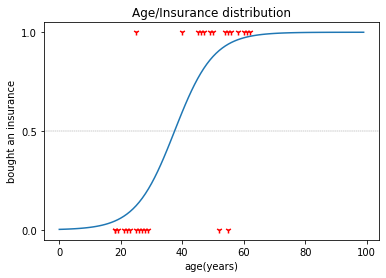

In [16]:
# Display the models internal sigmoid function together with data points
plt.yticks([0.0, 0.5, 1.0])  
plt.axhline(y=0.5, color='grey', linestyle='--', lw = 0.4)
plt.xlabel("age(years)")
plt.ylabel("bought an insurance")
plt.title("Age/Insurance distribution")
plt.scatter(df.age, df.bought_insurance, marker="1", color= "red")
plt.plot(
    # x values
    np.arange(0, 100, 1), 
    # using the models prediction on every age from 0 to 100 to plot the internal sigmoid function
    [y[1] for y in model.predict_proba(np.arange(0,100,1).reshape(100,1))]
    )

## Logistic Regression
---
---
Used for multiclass classification (handwritten digits in this case)

In [17]:
# load data (1797 samples, representing handwritten digits of 8x8 pixel as arrays of size 64)
digits = load_digits()
# get some info about the data format 
print(dir(digits))
print(type(digits))
# print first array
print(digits.data[0])

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
<class 'sklearn.utils.Bunch'>
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


array([0, 1, 2])

<Figure size 432x288 with 0 Axes>

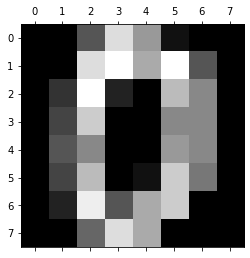

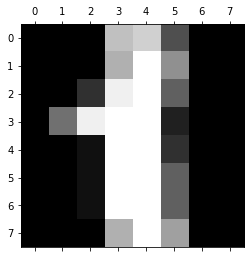

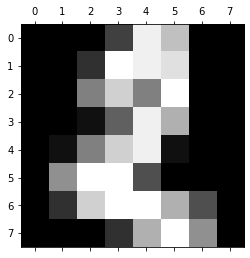

In [18]:
# display some digits
plt.gray()
for i in range(3):
    plt.matshow(digits.images[i])
# print corresponding labels
digits.target[:3]    

In [19]:
# splitting data into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size = 0.8)

In [20]:
# initializing the model, to fix warning about convergence increase number of iterations (default is max_iter = 100)
model = LogisticRegression(max_iter=200)
# pass data and train the model
model.fit(X_train, y_train)
# make a prediction on test set
predictions = model.predict(X_test)
print((predictions == y_test).sum(), "/", len(y_test), "samples correctly predicted")

347 / 360 samples correctly predicted


C:\Users\pompom\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(69.0, 0.5, 'Truth')

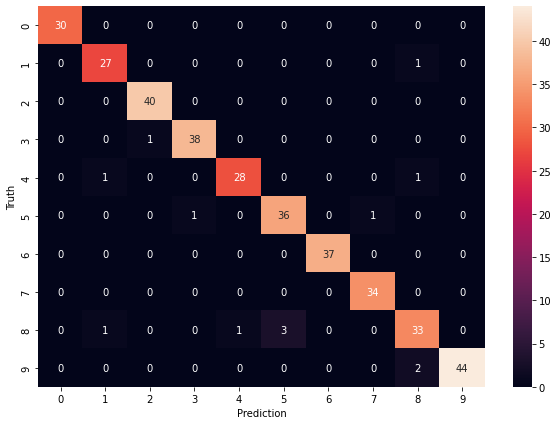

In [21]:
# print confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Prediction")
plt.ylabel("Truth")

## Decision Tree
---
---
Used for classification

- Gains information by splitting data into mutual exclusive subsets based on feature (low entropy within a subset = high information gain)

In [22]:
path = os.path.join("data", "titanic.csv")
# loading the data
df = pd.read_csv(path)
# display some of the numeric data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# discard unneeded data by creating a new dataframe
input_data = df.drop([
    "PassengerId", 
    "Name", 
    "Ticket", 
    "SibSp",
    "Parch",
    "Cabin",
    "Embarked"
    ], axis = "columns")
input_data.head(10)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
5,0,3,male,NaN,8.4583
6,0,1,male,54.0,51.8625
7,0,3,male,2.0,21.0750
8,1,3,female,27.0,11.1333
9,1,2,female,14.0,30.0708


In [24]:
# cleaning the data of NaN
print(input_data[input_data["Age"].isna()].shape[0], "entries in this dataframe contained NaN, now replaced with age average")
input_data = input_data.fillna(input_data.Age.median())

177 entries in this dataframe contained NaN, now replaced with age average


In [25]:
# encode nominal features into numeric values; 
# NOTE: an alternative way would be to introduce dummy variables usind pd.get_dummies(["Sex"], axis = "columns") and replace the nominal values
sex_encoder = LabelEncoder()
input_data["Sex"] = sex_encoder.fit_transform(input_data["Sex"])
# separating data and targets
targets, features = np.split(input_data, [1], axis = 1)
# converting targets from float into integer to avoid "Unknown label type: 'continuous-multioutput'" error
targets = targets.astype(int)

In [26]:
# splitting data into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size = 0.8)

In [27]:
# initializing the model
model = tree.DecisionTreeClassifier()
# pass data and train the model
model.fit(X_train, y_train)
# get prediction accuracy
model.score(X_test, y_test)

0.8044692737430168

## Support Vector Machine (SVM)
---
---
- can be used for classification & regression; highly effective in high vector spaces (samples with many features)<br><br>
- data points close to a separating margin (line, (hyper-)plane) are called *support vectors*<br><br>
- **NOTE**: "The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples." 
    - [src](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) (accessed: 14.01.22)<br><br>
---
some terminology:
- if data points are inseparable using a linear graph, new features can be introduced by transforming the existing data
    - e.g. if `x`, `y` are given features, `z = x² + y²` is a new dimension that could be used to separate the data, the function used for such a transformation is references as **kernel**<br><br>
- **gamma**: "[...] controls the distance of influence of a single training point. Low values of gamma indicates a large similarity radius which results in more points being grouped together. For high values of gamma, the points need to be very close to each other in order to be considered in the same group (or class). Therefore, models with very large gamma values tend to overfit." [src](https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167) (accessed: 21.01.22)<br><br>
- **Regularization (C)**: "`C` parameter adds a penalty for each misclassified data point. If c is small, the penalty for misclassified points is low so a decision boundary with a large margin is chosen at the expense of a greater number of misclassifications. If `C` is large, SVM tries to minimize the number of misclassified examples due to high penalty which results in a decision boundary with a smaller margin." src: see above 

In [28]:
# load data
iris = load_iris()
# get information about the data format 
print(dir(iris))
print(iris.feature_names)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [29]:
# converting data set into pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# appending DataFrame with target and -names as well
df["target"] = iris.target
df["name"] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


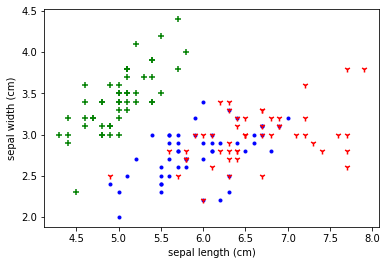

In [30]:
""" explore data visually """
# split data accordingly to class
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]
# display different classes using two of the four attributes
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.scatter(df0["sepal length (cm)"], df0["sepal width (cm)"], color="green", marker="+")
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"], color="blue", marker=".")
plt.scatter(df2["sepal length (cm)"], df2["sepal width (cm)"], color="red", marker="1")

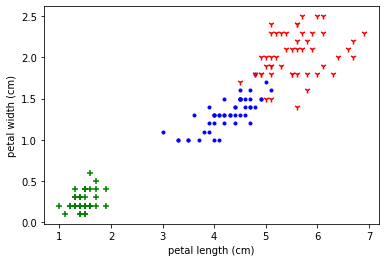

In [31]:
# display different classes using the two remaining attributes (other combinations are possible of course)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.scatter(df0["petal length (cm)"], df0["petal width (cm)"], color="green", marker="+")
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], color="blue", marker=".")
plt.scatter(df2["petal length (cm)"], df2["petal width (cm)"], color="red", marker="1")

In [32]:
# splitting data into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

In [33]:
# initializing the model
model = svm.SVC()
# pass data and train the model
model.fit(X_train, y_train)
# get prediction accuracy
model.score(X_test, y_test)

0.9666666666666667

In [34]:
# K-fold Cross Validation to manually explore different model configurations
print(np.average(cross_val_score(svm.SVC(kernel = "linear", C = 10, gamma = "auto"), X_train, y_train, cv = 5)))
print(np.average(cross_val_score(svm.SVC(kernel = "rbf", C = 10, gamma = "auto"), X_train, y_train, cv = 5)))
print(np.average(cross_val_score(svm.SVC(kernel = "linear", C = 20, gamma = "auto"), X_train, y_train, cv = 5)))

0.9333333333333332
0.95
0.9416666666666667


In [35]:
# Exhaustive Hyperparameter Tuning using GridSearchCV
clf = GridSearchCV(
    # providing the model architecture
    svm.SVC(),
    # defining the parameter grid to test upon
    {
        "C" : [1, 10, 20],
        "kernel" : ["rbf", "linear"]
    },
    # number of cross validations
    cv = 5, 
    return_train_score = True
)

clf.fit(iris.data, iris.target)
results = pd.DataFrame(clf.cv_results_)
# discard most of the additional information obtained during this process
results[["param_C", "param_kernel", "mean_test_score"]]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.966667
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.980000
5,20,linear,0.966667


## Random Forest Classifier
---
---

- Group of `n` decision trees, each with a different, random subset of given data<br><br>
- For classification a majority vote approach is used (greatest number of trees rooting for a certain class will result in classification) 

In [36]:
# load data
breast_cancer_dataset = load_breast_cancer()
# get information about the data format 
print(dir(breast_cancer_dataset))
print(breast_cancer_dataset.data.shape)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
(569, 30)


In [37]:
# display numeric data
pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [38]:
# Exploring different hyperparameter configurations of Random Forest via GridSearchCV
clf = GridSearchCV(
    # providing the model architecture
    RandomForestClassifier(),
    # defining the parameter grid to test upon
    {
        "n_estimators" : [10, 20, 50, 100, 250, 500],
        "criterion" : ["gini", "entropy"]
    },
    # number of cross validations
    cv = 5, 
    return_train_score = True
)
# pass data to models
clf.fit(breast_cancer_dataset.data, breast_cancer_dataset.target)
results = pd.DataFrame(clf.cv_results_)
# discard most of the additional information obtained during this process
results[["param_n_estimators", "param_criterion", "mean_test_score"]]

,param_n_estimators,param_criterion,mean_test_score
0,10,gini,0.957817
1,20,gini,0.956078
2,50,gini,0.957848
3,100,gini,0.957848
4,250,gini,0.963111
5,500,gini,0.964866
6,10,entropy,0.954324
7,20,entropy,0.968374
8,50,entropy,0.966605
9,100,entropy,0.968374


## K-Means Clustering
---
---
- unsupervised machine learning algorithm for clusterization
##### Approach 
1) place `k` *centroids* into data at a randomly choosen location<br><br>
2) assign data points to their closest *centroid* (clustering)<br><br>
3) relocate *centroids* to assigned data samples *center of gravity* and repeat process until composition of cluster does not change anymore or a treshold of iterations it reached<br><br>
---
**Determine the optimal number of clusters**

1) calculate the **sum of squared errors** (SSE) for all *clusters* and sum them up
$ SSE = \sum_{i=0}^{n}dist(x_{i} - c)²$
    - `i` = iterator, current index
    - `n` = total number of data points within cluster
    - `x` = data point within cluster
    - `c` = centroid<br><br>
2) increment `k` (number of total clusters)<br><br>

3) use *elbow* method to determine optimal `k` value
    - if plotted the *elbow point* shows the greatest change in slope with respect to the previous `k` value from steep to shallow

In [39]:
path = os.path.join("data", "income.csv")
# loading the data
df = pd.read_csv(path)
# display some of the data
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


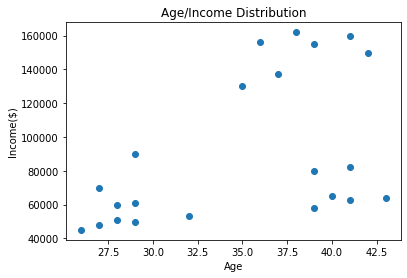

In [40]:
# explore data visually
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.title("Age/Income Distribution")
plt.scatter(df["Age"], df["Income($)"])

In [41]:
"""modifying the data"""
# drop nominal values and rename colums for workflow optimization
df = df.drop(["Name"], axis = "columns")
df = df.rename(columns = {"Age" : "age", "Income($)": "income"})
df.head()

,age,income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


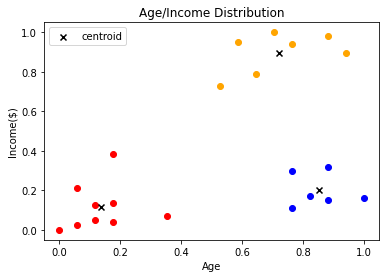

In [42]:
# init model
model = KMeans(n_clusters = 3)
# NOTE: due to features are unscaled yet, the clustering would not be sufficient
# scaling the features in a range from 0 to 1
scalar = MinMaxScaler()
df.income = scalar.fit_transform(df.income.values.reshape(-1, 1))
df.age = scalar.fit_transform(df.age.values.reshape(-1, 1))
df.head()
# pass data and make prediction and assign it to DataFrame
df["prediction"] = model.fit_predict(df)
# before visualization data is split based on prediction
c0 = df[df.prediction == 0]
c1 = df[df.prediction == 1]
c2 = df[df.prediction == 2]

plt.xlabel("Age")
plt.ylabel("Income($)")
plt.title("Age/Income Distribution")
plt.scatter(c0.age, c0.income, color = "red")
plt.scatter(c1.age, c1.income, color = "blue")
plt.scatter(c2.age, c2.income, color = "orange")
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c="black", marker = "x", label = "centroid")
plt.legend()

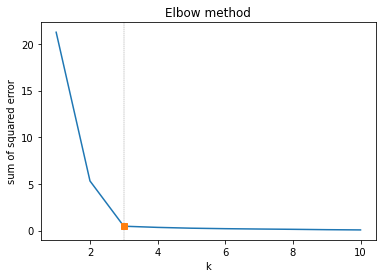

In [43]:
# check if k = 3 is the optimal value for clusterization of this data set
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df)
    # inertia_ = sum of squared errors
    sse.append(kmeans.inertia_)

plt.xlabel("k")
plt.ylabel("sum of squared error")
plt.title("Elbow method")
plt.axvline(x=3, color='grey', linestyle='--', lw = 0.4)
plt.plot(range(1, 11), sse)    
plt.plot(3, sse[2], "s")

## Naive Bayes Classifier 
---
---
- uses the (naive) assumption that all featured considered during classification process are independent in order to reduce calculation<br><br>

- Bayes Theorem: $P(A|B) = \frac{P(B|A)*P(A)}{P(B)}$ <br><br>

- For classification this can be understood the following way: 
    - What is the probability of a class for a given set of features? $P(\text{class probability yet to be calculated}|\text{some given features})$<br><br>

- suppose `X = {x1, x2, x3, ..., xn}` are given features and `y` is a binary classification problem
{0 = features do not belong to class y, 1 = features do belong to class y}<br><br>

- $P(y|X) = P(y|x1, x2, x3, ..., xn) = \frac{P(x_1|y)*P(x_2|y)*P(x_3|y)*...*P(x_n|y)*P(y)}{P(x_1)*P(x_2)*P(x_3)*...*P(x_n)} = \frac{P(y)*\prod_{i=1}^{n}P(x_i|y)}{P(X)}$ <br><br> 
- Bayes Classifier: $y = argmax(\frac{P(y)*\prod_{i=1}^{n}P(x_i|y)}{P(X)})$ 

In [44]:
path = os.path.join("data", "spam.csv")
# loading the data
df = pd.read_csv(path)
# display some of the data
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
# get some information about the data to be used for building a spam-mail classifier
df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [46]:
# replace nominal with numeric values (spam = 1, ham = 0)
targets = df["Category"].apply(lambda x: 1 if x == "spam" else 0)
# using CountVectorize to assign a unique number to each word derived from a the index in a set of words of the entire data
vectorizer = CountVectorizer()
corpus_as_vectors = vectorizer.fit_transform(df.Message.values)
features = corpus_as_vectors.toarray()
# splitting data into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.25)

In [47]:
# initializing the model 
# NOTE: there are other Naive Bayes Classifier available (see: https://scikit-learn.org/stable/modules/classes.html?highlight=bayes#module-sklearn.naive_bayes), e.g.
# -> Bernoulli NB (assumes that all features are binary), 
# -> Gaussian NB (assumes a normal distribution of features, operates on continous values)
# -> Multinomial NB is used when there is discrete data and frequency of occurence
model = MultinomialNB()
# pass data and train the model
model.fit(X_train, y_train)
# get prediction accuracy
model.score(X_test, y_test)

0.9813352476669059

In [48]:
# live demo
unseen_data = [
    "Million Dollar Win, click here for free money, this is an exclusive offer.",
    "Can you pick up the kids today? Love you ♥"
]
unseen_data_count_vector = vectorizer.transform(unseen_data)
model.predict(unseen_data_count_vector)

array([1, 0], dtype=int64)

In [49]:
# building a pipeline for convenience regarding the usage, this way transforming the data manually can be ommitted
# splitting data into Training and Test sets, using the previously binary encoded labels and raw text messages as features
X_train, X_test, y_train, y_test = train_test_split(df.Message, targets, test_size=0.25)

nb_classifier = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("naive_Bayes_multinomial_classifier", MultinomialNB())
])

nb_classifier.fit(X_train, y_train)
nb_classifier.predict_proba(unseen_data)

array([[1.36422518e-02, 9.86357748e-01],
       [9.99998027e-01, 1.97314733e-06]])

## L1, L2 Regularization aka Lasso, Ridge Regression
---
---
- adding a scalable penalty to loss-function to reduce *overfitting*

**mse** : $\frac{1}{n}\sum_{i=1}^{n}(y_{i}-y_{predicted})²$<br><br>
**L1** : $ mse = \frac{1}{n}\sum_{i=1}^{n}(y_{i}-h_{\theta}(x_{i}))² + \lambda\sum_{i=1}^{n}|\theta_{i}|$<br><br>
**L2** : $ mse = \frac{1}{n}\sum_{i=1}^{n}(y_{i}-h_{\theta}(x_{i}))² + \lambda\sum_{i=1}^{n}\theta_{i}^{2}$
- `mse` = mean squared error
- `n` = total number of data points
- `i` = iterator
- `y` = label
- `h` = hypothesis
    - e.g. when using linear regression <center> $f(x) = \text{slope}*x + \text{interception with y-axis} =$ <br> $y = mx + n$ </center> 
    it can be rewritten as <center> $h_{\theta}(x) = \theta_{0}x + \theta_{1}$ </center> 
- `θ` = weight assigned to features (sensitivity)
- `x` = feature
- `λ` = scalar for penality (small value results in great penalty, and vice versa)

In [50]:
path = os.path.join("data", "Melbourne_housing_FULL.csv")
# loading the data
df = pd.read_csv(path)
# display data
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [51]:
# explore dataset
print(df.nunique())
print(df.shape)

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64
(34857, 21)


In [52]:
# discard unneeded data by creating a new dataframe
df_reduced = df[[
    "Suburb", 
    "Rooms", 
    "Type", 
    "Method",
    "SellerG",
    "Regionname",
    "Propertycount",
    "Distance",
    "CouncilArea",
    "Bedroom2",
    "Bathroom",
    "Car",
    "Landsize",
    "BuildingArea",
    "Price",
    ]]
df_reduced.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [53]:
# option to supress warnings about working on a copy of a slice of a DataFrame in upcoming cell
import warnings
warnings.filterwarnings('ignore')

In [54]:
# check for missing values
print(df_reduced.isna().sum())
# fill listed columns with zero
cols_to_be_zero_filled = ["Propertycount", "Distance", "Bedroom2", "Bathroom", "Car"]
df_reduced[cols_to_be_zero_filled] = df_reduced[cols_to_be_zero_filled].fillna(0)
# fill specified columns with mean values
df_reduced.Landsize = df_reduced.Landsize.fillna(df_reduced.Landsize.mean())
df_reduced.BuildingArea = df_reduced.BuildingArea.fillna(df_reduced.BuildingArea.mean())
# drop nominal features with values not available
df_reduced.dropna(inplace = True)

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64


In [55]:
# display cleaned DataFrame
print(df_reduced.isna().sum())

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64


In [56]:
# use dummies to one-hot-encode categorical features, use drop_first to avoid dummy variable trap
df_reduced = pd.get_dummies(df_reduced, drop_first = True)
# split data into Training and Testing set
X = df_reduced.drop("Price", axis = 1)
y = df_reduced.Price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [57]:
# initializing and training the model
model = LinearRegression().fit(X_train, y_train)
# evaluate model -> massive overfitting
model.score(X_test, y_test)

0.13853683161492103

In [58]:
# using L1-regularized model instead
model_lasso = Lasso(
    # constant that multiplies the L1 term - synonym to lambda (see above)
    alpha = 50, 
    max_iter = 100,
    # tolerance for the optimization
    tol = 0.1
)
model_lasso.fit(X_train, y_train)
model_lasso.score(X_test, y_test)

0.6636111369404488

In [59]:
# using L2-regularized model instead
model_ridge = Ridge(alpha = 50, max_iter = 100, tol = 0.1)
model_ridge.fit(X_train, y_train)
model_ridge.score(X_test, y_test)

0.6670848945194959

## K-Nearest Neighbours (KNN)
---
---
- can be used for classification & regression
- `k` = natural number constant; represents the count of points that will be taken into consideration during classification (majority => class, best to use an odd number)
    - e.g. `k` = 15, consider the **nearest** (eucledian distance) 15 datapoints to determine the class of the sample (optimal value for `k` depends on size of given data)
- *weights* parameter:
    - uniform -> only consider count of nearest neighbours
    - distance -> closer points are assigned a greater importance

In [60]:
# load data, for a visual representation see code above (SVM)
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# splitting data into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

In [61]:
model = KNeighborsClassifier(
    n_neighbors = 3,
    weights = "distance"
    )
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(42.0, 0.5, 'Truth')

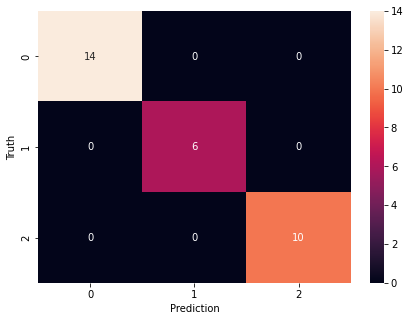

In [62]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.xlabel("Prediction")
plt.ylabel("Truth")

## Principal Component Analysis (PCA)
---
---
- Identifying dimensions/features that are most influencial with regards to the target variable, used for speeding up computation
- find features with **high variance** within given dataset, omit less influencial ones, the newly calculated features after this reduction of dimensions are referred to as **principal components**
-> [additional information](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html) (accessed: 10.02.22)
- ⚠️ Features need to be scaled before PCA is applied
- ⚠️ PCA can become a trade-off between computational complexity and accuracy, due to the interaction of features is not taken into consideration here

In [71]:
# again using the handwritten dataset, where each array of shape (8, 8) represented as handwritten number and the entries can be interpreted as brightness values
raw_data = load_digits()
df = pd.DataFrame(raw_data.data, columns = raw_data.feature_names)
# explore dataset numerically
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [91]:
# Scaling features 
scalar = StandardScaler()
scaled_data = scalar.fit_transform(df)
# splitting data into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, raw_data.target, test_size=0.2)

# Training and Testing a modell on unreduced data
model = LogisticRegression().fit(X_train, y_train)
print("Performance without PCA:", model.score(X_test, y_test))

# NOTE: n_compoments can be used to determine how many features to keep, but PCA accepts float vallues as well, indicating a percentage of all available features
pca = PCA(0.95)
scaled_data_pca = pca.fit_transform(scaled_data)

Performance without PCA: 0.9694444444444444


In [86]:
# show how much variance of the dataset is associated with newly computatetd principal components
pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.03389381, 0.02998221, 0.02932003,
       0.02781805, 0.02577055, 0.02275303, 0.0222718 , 0.02165229,
       0.01914167, 0.01775547, 0.01638069, 0.0159646 , 0.01489191,
       0.0134797 , 0.01271931, 0.01165837, 0.01057647, 0.00975316,
       0.00944559, 0.00863014, 0.00836643, 0.00797693, 0.00746471,
       0.00725582, 0.00691911, 0.00653909, 0.00640793, 0.00591384,
       0.00571162, 0.00523637, 0.00481808, 0.00453719, 0.00423163])

In [93]:
# splitting data into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data_pca, raw_data.target, test_size=0.2)
# Training and Testing a modell on unreduced data
model = LogisticRegression().fit(X_train, y_train)
print("Performance with PCA:", model.score(X_test, y_test))

Performance with PCA: 0.9666666666666667
